In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
#                                                         , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
#                                                         , 'depth_error', 'mag_err'])
# df['timestamp'] = df.decimal_year.apply(timestamps.convert_decimal_year_to_numpy_datetime64)

df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

In [3]:
# df[(df.decimal_year > 2011) & (df.mag >= 6.5) & (df.depth <= 40) & (df.lon.between(142, 143))]

In [4]:
noto_hanto = {'coordinates':(136.686000, 37.220667), 'time':'2007-03-25 00:41:57.909996', 'tz':'UTC', 'magnitude':6.9}
western_tottori = {'coordinates':(133.349, 35.274167), 'time':'2000-10-06 04:30:17.940011', 'tz':'UTC', 'magnitude':6.7}
sugura_bay = {'coordinates':(138.499333, 34.786167), 'time':'2009-08-10 20:07:05.740017', 'tz':'UTC', 'magnitude':6.5}
iwaki = {'coordinates':(140.672667, 36.945667), 'time':'2011-04-11 08:16:12.020008', 'tz':'UTC', 'magnitude':6.6}
iwate_miyage = {'coordinates':(140.880667, 39.029833), 'time':'2008-06-13 23:43:45.359992', 'tz':'UTC', 'magnitude':6.8}
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00', 'tz':'UTC', 'magnitude':7.0}
tohoku = {'coordinates':(142.861000, 38.103500), 'time':'2011-03-11 05:46:18.119983', 'tz':'UTC', 'magnitude':9.0}

def plot_earthquake_on_basemap(eq, m, ax, **kwargs):
    x, y = m(eq['coordinates'][0], eq['coordinates'][1])
    ax.scatter(x, y, s=0.75*np.exp(eq['magnitude']), **kwargs)
    ax.annotate('{year} M{mag}'.format(year=np.datetime64(eq['time']).astype('datetime64[Y]').astype(str)
                                              , mag=str(eq['magnitude']))
                , xy=(x, y), xytext=(x, y+0.5), fontsize=15, color='red', fontweight='bold')

# iwaki

In [5]:
eq = iwaki

In [6]:
df_regional = polygon_selection.get_node_data(data=df, node=eq['coordinates'], radius=75, m=1)

(<matplotlib.figure.Figure at 0x7f6fc40b1940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6f8d2cd940>)

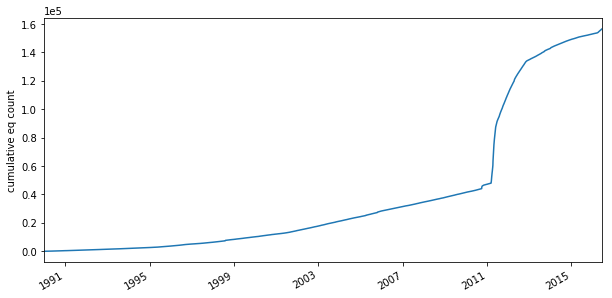

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
plotting.plot_seismicity_rate(dataframe=df_regional[df_regional.mag>=0.5], fig=fig, ax=ax)

In [8]:
df_regional = df_regional.loc[df_regional.index < eq['time']]
# df_regional = df_regional[df_regional.depth <=10]
df_regional = df_regional[df_regional.mag >= 0.5]

(<matplotlib.figure.Figure at 0x7f6f8baf9b38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6f8bb049b0>)

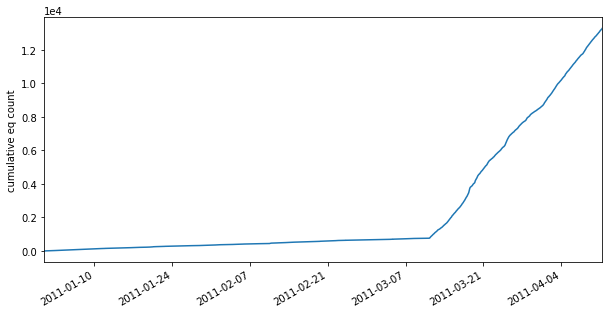

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
plotting.plot_seismicity_rate(dataframe=df_regional.loc[df_regional.index > '2011'], fig=fig, ax=ax)
# ax.text(s='dfgdfg', x=2003, y=1000)
# fig.savefig('iwaki_seismicity_cnt.png', dpi=300, bbox_inches='tight')

In [10]:
df_regional = df_regional.loc[df_regional.index < '2011-03-07'].copy()

In [11]:
df_regional = df_regional[df_regional.depth <=25].copy()

(<matplotlib.figure.Figure at 0x7f6f8caba550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6f8c11a898>)

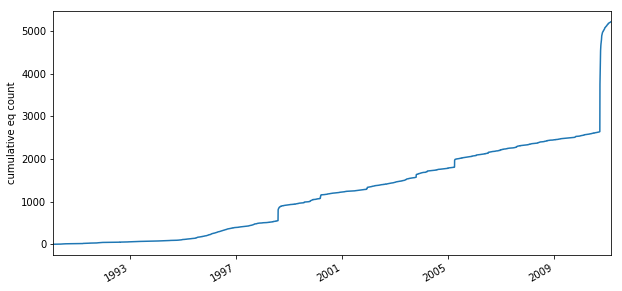

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plotting.plot_seismicity_rate(dataframe=df_regional, fig=fig, ax=ax)
# ax.text(s='dfgdfg', x=2003, y=1000)
# fig.savefig('iwaki_seismicity_cnt.png', dpi=300, bbox_inches='tight')

In [14]:
# fig, ax = plt.subplots(figsize=(10,5))
# plotting.plot_seismicity_rate(dataframe=df[(df.index > '2011-03-04') & (df.index <'2011-03-19')], fig=fig, ax=ax)
# # ax.text(s='dfgdfg', x=2003, y=1000)
# # fig.savefig('iwaki_seismicity_cnt.png', dpi=300, bbox_inches='tight')

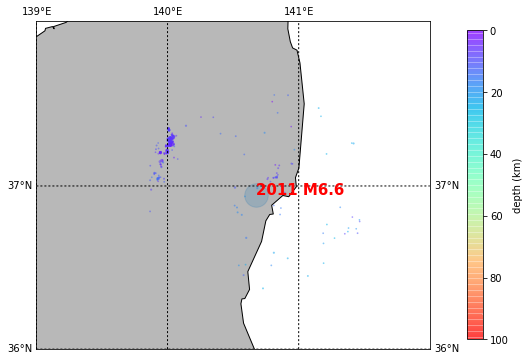

In [17]:
m, fig, ax = plotting.plot_seismicity_map(dataframe=df_regional[df_regional.mag>2])
plot_earthquake_on_basemap(m=m, eq=eq, ax=ax, alpha=0.2)

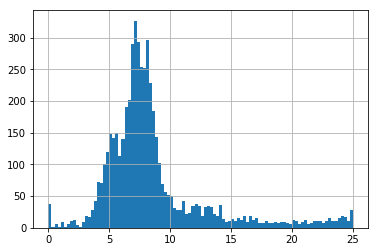

In [20]:
ax = df_regional.depth.hist(bins=100)
# ax.set_xlim(0,25)

In [21]:
stats.calc_fmd_stats_with_mc(df_regional.mag)

(4.1132126094900672,
 0.70320596263682411,
 3.9273790845930161e-15,
 4178,
 0.69999999999999996)

In [22]:
radii = np.arange(1, 51, 1)
foreshock_time = eq['time']

timii = pd.date_range(start='01-01-1990 00:00:00', end=foreshock_time, freq='6M', tz='GMT')
parameters = [x for x in product(radii, timii)]
df_regional = df_regional.loc[df_regional.index < foreshock_time]
# df_regional = df_regional[df_regional.mag >= 0.5]
# df_regional = df_regional[df_regional.depth <= 25]
n_iterations = 100

bdf = stats.calculate_b_value_parameter_sweep(dataframe=df_regional
                                              ,location=eq['coordinates']
                                              ,n_iterations=n_iterations
                                              ,parameters=parameters)

/home/max/pymap3/utilities/stats.py:45: RuntimeWarning: invalid value encountered in true_divide
  b_stddev = square_every_value((magnitudes - average).sum()) / (length * (length - 1))


/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  import sys


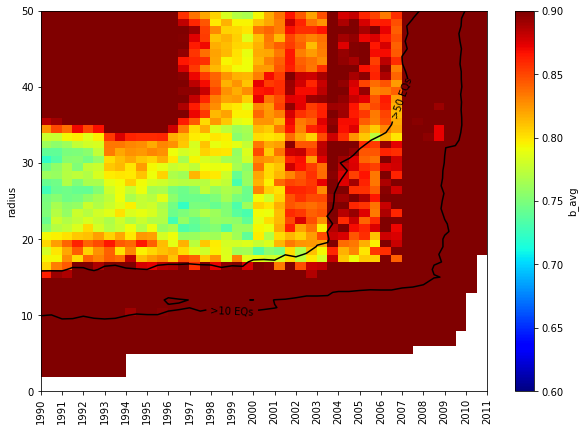

In [23]:
fig, ax = plt.subplots(figsize=(10,7))

fig, ax = plotting.plot_radius_time_sweep(dataframe=bdf, vertical_axis='radius'
                                 , value='b_avg',vmin=0.6, vmax=0.9, cmap='jet', fig=fig, ax=ax)

zi = bdf.pivot(index='start_time', columns='radius', values='n_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi).transpose()

levels = [10, 50, 250, 1000, 5000]
cs = ax.contour(xi,yi,zi, levels, colors='black')#, locator=ticker.LogLocator())

cs.levels = ['>10 EQs', '>50 EQs','>250 EQs', '>1000 EQs', '>5000 EQs']

ax.clabel(cs, cs.levels, inline=True)
ax.set_ylim(0,50)


fig.savefig('iwaki_parameter.png', dpi=300, bbox_inches='tight', transparency=True)

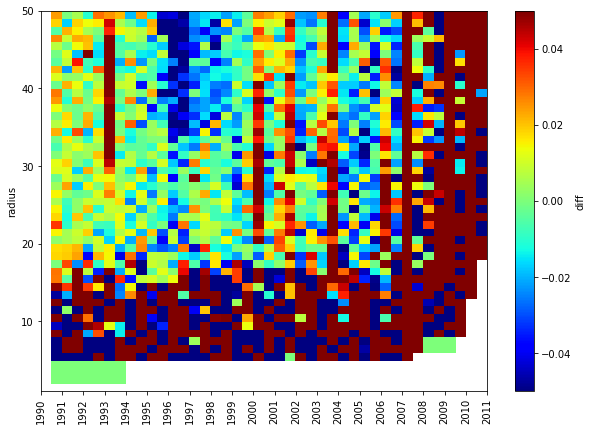

In [24]:
bdf['diff'] = bdf.b_avg.diff()

fig, ax = plt.subplots(figsize=(10,7))

fig, ax = plotting.plot_radius_time_sweep(dataframe=bdf, vertical_axis='radius'
                                 , value='diff',vmin=-0.05, vmax=0.05, cmap='jet', fig=fig, ax=ax)

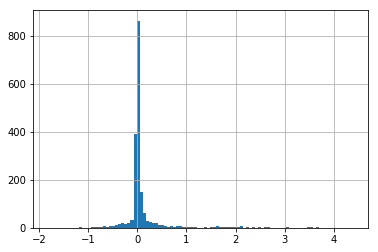

In [25]:
bdf['diff'].hist(bins=100,)

In [26]:
bdf.describe()

,radius,a_avg,b_avg,bstd_avg,n_avg,mc_avg,a_std,b_std,bstd_std,n_std,mc_std,diff
count,2150.000000,1928.000000,1928.000000,1.890000e+03,1928.000000,1928.000000,1928.000000,1.928000e+03,1.890000e+03,1928.000000,1928.000000,1879.000000
mean,25.500000,3.793399,1.643305,7.444501e-16,61.875873,1.109454,1.659430,8.054490e-01,1.039497e-15,19.688195,0.182907,0.118847
std,14.434227,2.276210,1.657927,5.841627e-16,49.180560,0.172261,2.950686,1.210701e+00,1.628580e-15,14.724147,0.056926,0.531295
min,1.000000,1.900153,0.722591,4.780362e-17,1.000000,0.818000,0.000000,5.374814e-15,0.000000e+00,0.000000,0.000000,-1.810514
25%,13.000000,2.625955,0.825880,4.366418e-16,14.566945,0.962000,0.126729,9.559479e-02,3.922350e-16,8.783155,0.141557,-0.020442
50%,25.500000,2.898681,0.914619,5.460094e-16,58.705000,1.080500,0.167427,1.275222e-01,5.287444e-16,17.129678,0.183408,0.004031
75%,38.000000,3.505153,1.331896,8.280479e-16,91.975000,1.283250,1.499454,9.484652e-01,9.744892e-16,27.660741,0.227840,0.045457
max,50.000000,15.248460,8.685890,6.764540e-15,204.280000,1.401000,12.410156,4.133867e+00,1.543086e-14,77.632244,0.315234,4.380656


In [28]:
df_calc = df_regional.copy()

rows = []

for r, t in parameters:
    df_c = polygon_selection.get_node_data(node=eq['coordinates'], data=df_calc, radius=r, m=1)
    df_c = df_c.loc[df_c.index >= t]
    
    a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_c.mag)
    row = np.array((r,) + (t,) + (a, b, bstd, n, mc))
    rows.append(row)
    

/home/max/pymap3/utilities/stats.py:45: RuntimeWarning: invalid value encountered in true_divide
  b_stddev = square_every_value((magnitudes - average).sum()) / (length * (length - 1))


In [29]:
true_bdf = pd.DataFrame(rows, columns=['radius', 'start_time', 'a', 'b', 'bstd', 'n', 'mc'])


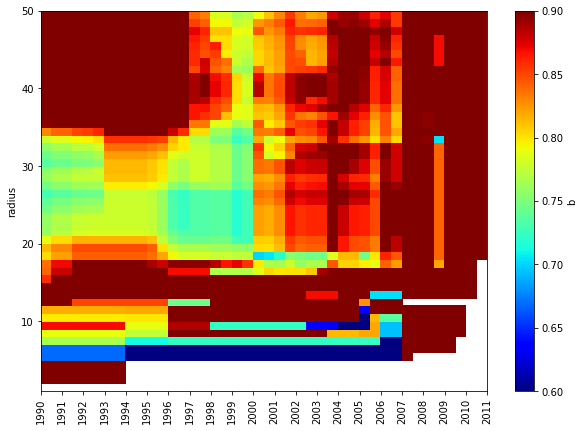

In [31]:
fig, ax = plt.subplots(figsize=(10,7))

fig, ax = plotting.plot_radius_time_sweep(dataframe=true_bdf, vertical_axis='radius'
                                 , value='b',vmin=0.6, vmax=0.9, cmap='jet', fig=fig, ax=ax)

# zi = bdf.pivot(index='start_time', columns='radius', values='n')
# xi_label = [np.datetime64(z, 'Y') for z in zi.index]
# xi = np.arange(len(xi_label))
# yi = zi.columns
# xi, yi = np.meshgrid(xi, yi)

# zi = np.ma.masked_invalid(zi).transpose()

# levels = [10, 50, 250, 1000, 5000]
# cs = ax.contour(xi,yi,zi, levels, colors='black')#, locator=ticker.LogLocator())

# cs.levels = ['>10 EQs', '>50 EQs','>250 EQs', '>1000 EQs', '>5000 EQs']

# ax.clabel(cs, cs.levels, inline=True)
# ax.set_ylim(0,50)


# fig.savefig('iwaki_parameter.png', dpi=300, bbox_inches='tight', transparency=True)

In [33]:
bdf.to_csv('b_iwaki_04_13_2017.csv', index=True)

In [35]:
true_bdf.to_csv('b_true_iwaki_04_13_2017.csv', index=True)